In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


c:\program files\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
import keras
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

path = "C:\\Dev\\Smart Car Project\\Dataset-prep\\"
model = "JNET-b64-s43-lr4-e20\\"

In [3]:
plt.rc('legend',fontsize=8)
plt.rc('lines', linewidth=0.4)
plot_percentage = 0.008

c:\program files\python38\lib\site-packages\tensorflow\python\keras\layers\core.py:1057: UserWarning: src.nnetwork.model is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


Found 486 non-validated image filenames.


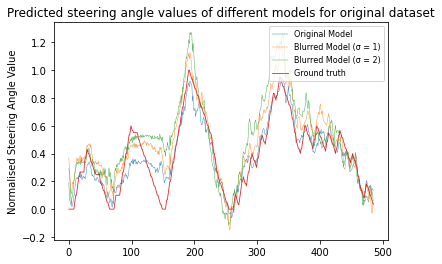

In [4]:
model_sm = keras.models.load_model(path + "self-made\\" + model + "model-018-0.008.h5")
model_bl = keras.models.load_model(path + "self-made-blur\\" + model + "model-020-0.008.h5")
model_st = keras.models.load_model(path + "self-made-blur-str\\" + model + "model-018-0.008.h5")

df = pd.read_csv(path + "self-made\\output-aug.csv")
datagen = ImageDataGenerator(validation_split=plot_percentage)
valid_generator = datagen.flow_from_dataframe(dataframe=df, directory=path + "self-made\\" + "frames",
                                              validate_filenames=False, x_col='filename', y_col='angle',
                                              class_mode="raw", seed=43, target_size=(240, 320),
                                              subset="validation", batch_size=64, shuffle=False)

pred_sm = [a_tuple[0] for a_tuple in model_sm.predict(valid_generator)]
pred_bl = [a_tuple[0] for a_tuple in model_bl.predict(valid_generator)]
pred_st = [a_tuple[0] for a_tuple in model_st.predict(valid_generator)]
labels = [label for label in valid_generator.labels]

plt.plot(pred_sm, label='Original Model')
plt.plot(pred_bl, label='Blurred Model (σ = 1)')
plt.plot(pred_st, label='Blurred Model (σ = 2)')
plt.plot(labels, label='Ground truth', lw=0.8)
plt.title('Predicted steering angle values of different models for original dataset')
plt.ylabel('Normalised Steering Angle Value')
plt.xlabel('')
plt.legend(loc="upper right")
plt.savefig("models-on-orig.png", dpi=1200)
plt.show()

Found 486 non-validated image filenames.
Found 486 non-validated image filenames.
Found 486 non-validated image filenames.


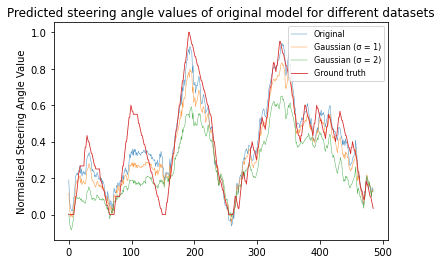

In [5]:
model_sm = keras.models.load_model(path + "self-made\\" + model + "model-018-0.008.h5")

df = pd.read_csv(path + "self-made\\output-aug.csv")

datagen = ImageDataGenerator(validation_split=plot_percentage)
gen_sm = datagen.flow_from_dataframe(dataframe=df, directory=path + "self-made\\frames",
                                              validate_filenames=False, x_col='filename', y_col='angle',
                                              class_mode="raw", seed=43, target_size=(240, 320),
                                              subset="validation", batch_size=64, shuffle=False)

gen_bl = datagen.flow_from_dataframe(dataframe=df, directory=path + "self-made-blur\\frames",
                                              validate_filenames=False, x_col='filename', y_col='angle',
                                              class_mode="raw", seed=43, target_size=(240, 320),
                                              subset="validation", batch_size=64, shuffle=False)

gen_st = datagen.flow_from_dataframe(dataframe=df, directory=path + "self-made-blur-str\\frames",
                                              validate_filenames=False, x_col='filename', y_col='angle',
                                              class_mode="raw", seed=43, target_size=(240, 320),
                                              subset="validation", batch_size=64, shuffle=False)

pred_sm = [a_tuple[0] for a_tuple in model_sm.predict(gen_sm)]
pred_bl = [a_tuple[0] for a_tuple in model_sm.predict(gen_bl)]
pred_st = [a_tuple[0] for a_tuple in model_sm.predict(gen_st)]
labels = [label for label in gen_sm.labels]

plt.plot(pred_sm, label='Original')
plt.plot(pred_bl, label='Gaussian (σ = 1)')
plt.plot(pred_st, label='Gaussian (σ = 2)')
plt.plot(labels, label='Ground truth', lw=0.8)
plt.title('Predicted steering angle values of original model for different datasets')
plt.ylabel('Normalised Steering Angle Value')
plt.xlabel('')
plt.legend(loc="upper right")
plt.savefig("orig-on-datasets.png", dpi=1200)
plt.show()

c:\program files\python38\lib\site-packages\tensorflow\python\keras\layers\core.py:1057: UserWarning: src.nnetwork.model is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


Found 486 non-validated image filenames.


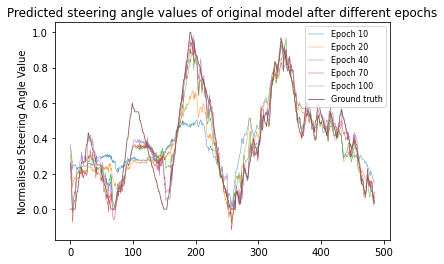

In [8]:
model_10 = keras.models.load_model(path + "self-made\\JNET-b128-s43-lr4-e100\\model-010-0.013.h5")
model_20 = keras.models.load_model(path + "self-made\\JNET-b128-s43-lr4-e100\\model-020-0.010.h5")
model_40 = keras.models.load_model(path + "self-made\\JNET-b128-s43-lr4-e100\\model-040-0.007.h5")
model_70 = keras.models.load_model(path + "self-made\\JNET-b128-s43-lr4-e100\\model-070-0.006.h5")
model_100 = keras.models.load_model(path + "self-made\\JNET-b128-s43-lr4-e100\\model-100-0.005.h5")

df = pd.read_csv(path + "self-made\\output-aug.csv")
datagen = ImageDataGenerator(validation_split=plot_percentage)
valid_generator = datagen.flow_from_dataframe(dataframe=df, directory=path + "self-made\\" + "frames",
                                              validate_filenames=False, x_col='filename', y_col='angle',
                                              class_mode="raw", seed=43, target_size=(240, 320),
                                              subset="validation", batch_size=64, shuffle=False)

pred_10 = [a_tuple[0] for a_tuple in model_10.predict(valid_generator)]
pred_20 = [a_tuple[0] for a_tuple in model_20.predict(valid_generator)]
pred_40 = [a_tuple[0] for a_tuple in model_40.predict(valid_generator)]
pred_70 = [a_tuple[0] for a_tuple in model_70.predict(valid_generator)]
pred_100 = [a_tuple[0] for a_tuple in model_100.predict(valid_generator)]
labels = [label for label in valid_generator.labels]

plt.plot(pred_10, label='Epoch 10')
plt.plot(pred_20, label='Epoch 20')
plt.plot(pred_40, label='Epoch 40')
plt.plot(pred_70, label='Epoch 70')
plt.plot(pred_100, label='Epoch 100')
plt.plot(labels, label='Ground truth', lw=0.8)
plt.title('Predicted steering angle values of original model after different epochs')
plt.ylabel('Normalised Steering Angle Value')
plt.xlabel('')
plt.legend(loc="upper right")
plt.savefig("model-by-epoch.png", dpi=1200)
plt.show()
